In [1]:
#%%
# Student Name: Pedro David Rodríguez Garrido-1905447
import numpy as np
import matplotlib.pyplot as plt

# Declare data
U = [1,2,3,4,5,6,7,8]
points = np.array([[86,37],[17,94],[3,65],[48,43],[78,70],[17,55],[62,91],[78,91]])
distances = np.array([['1-2',89],['1-3',87],['1-4',38],['1-5',33],['1-6',71],['1-7',59],['1-8',54],['2-3',32],['2-4',59],['2-5',65],['2-6',39],['2-7',45],['2-8',61],['3-4',50],['3-5',75],
                      ['3-6',17],['3-7',64],['3-8',79],['4-5',40],['4-6',33],['4-7',50],['4-8',56],['5-6',62],['5-7',26],['5-8',21],['6-7',57],['6-8',70],['7-8',16]])

# Show starting points
def showSP():
    plt.scatter(points[:, 0], points[:, 1], c='blue', s=20)
    for i in range(len(points)):
        plt.annotate(i+1, points[i])
    plt.show()

In [2]:
# Determine initial subtour
minD = min(distances[:, 1])
locateIS = np.argwhere(distances[:, 1] == minD)
sPoints = distances[locateIS[0], 0]
T = sPoints[0].split("-")
for i in range(len(T)):
    T[i] = int(T[i])
    U.remove(T[i])

In [3]:
# Calculating the average distance of all the unvisited cities
def distanceC(T,U):
    gmin_d = []
    for i in range(len(U)):
        dsubtour_point = []
        for j in range(len(T)):
            if int(T[j]) < int(U[i]):
                dtt = str(T[j])+'-'+str(U[i])
            else:
                dtt = str(U[i])+'-'+str(T[j])
            pg = np.argwhere(distances[:, 0] == dtt)
            gd = distances[pg[0], 1]
            dsubtour_point.append(gd[0])
        # Calculating distance
        s = 0
        for distance in range(len(dsubtour_point)):
            s += int(dsubtour_point[distance])
        fd_sp = s/(len(T))
        gmin_d.append([fd_sp, U[i]])
    # Get minimum distance
    min_dcity = min(gmin_d)
    cityToAdd = min_dcity[1]
    print("The city to add is number: "+str(cityToAdd))
    return cityToAdd

In [4]:
# Calculating the cost of insertion
def costOfInsertion(cityToAdd):
    print('Previous subtour: '+str(T))
    costs = []
    for i in range(len(T)):
        T.insert(i+1,cityToAdd)
        # Distance between previous city to the added city
        if int(T[i]) < int(cityToAdd):
            dtt = str(T[i])+'-'+str(cityToAdd)
        else:
            dtt = str(cityToAdd)+'-'+str(T[i])
        pg = np.argwhere(distances[:, 0] == dtt)
        pd = distances[pg[0], 1]
        # Distance between next city and the added city
        try: 
            if int(T[i+2]) < int(cityToAdd):
                dtt = str(T[i+2])+'-'+str(cityToAdd)
            else:
                dtt = str(cityToAdd)+'-'+str(T[i+2])
        except:
            if int(T[0]) < int(cityToAdd):
                dtt = str(T[0])+'-'+str(cityToAdd)
            else:
                dtt = str(cityToAdd)+'-'+str(T[0])
        ng = np.argwhere(distances[:, 0] == dtt)
        nd = distances[ng[0], 1]
        # Distance between previous and next city
        try:
            ncity = T[i+2]
        except:
            ncity = T[0]
        if int(T[i]) < int(ncity):
            dtt = str(T[i])+'-'+str(ncity)
        else:
            dtt = str(ncity)+'-'+str(T[i])
        pn = np.argwhere(distances[:, 0] == dtt)
        pnd = distances[pn[0], 1]
        costs.append(int(int(pd)+int(nd)-int(pnd)))
        T.remove(cityToAdd)
    T.insert(costs.index(min(costs))+1,cityToAdd)
    print('New subtour: '+str(T))

In [5]:
# Graphing the lines of the subtour
def sPlot(T):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(points[:, 0], points[:, 1], c='blue', s=20)
    for i in range(len(points)):
        plt.annotate(i+1, points[i])
    nCitySubtour = len(T)-1
    for i in range(nCitySubtour):
        try:
            x1, y1, x2, y2 = points[T[i]-1, 0],points[T[i]-1, 1],points[(T[i+1]-1), 0],points[(T[i+1]-1), 1]
        except:
            pass
        ax.plot([x1,x2], [y1,y2])
    spx, spy = points[T[0]-1, 0], points[T[0]-1, 1]
    npx, npy = points[T[nCitySubtour]-1, 0], points[T[nCitySubtour]-1, 1]
    ax.plot([spx,npx],[spy,npy])
    plt.title('Subtour: '+str(T))
    plt.show()

In [6]:
def newTandU():
    for i in range(len(T)):
        try:
            U.remove(T[i])
        except:
            pass
    if len(U)!=0:
        print('New U: '+str(U))
    else:
        print('Final Tour:' +str(T))


Cities


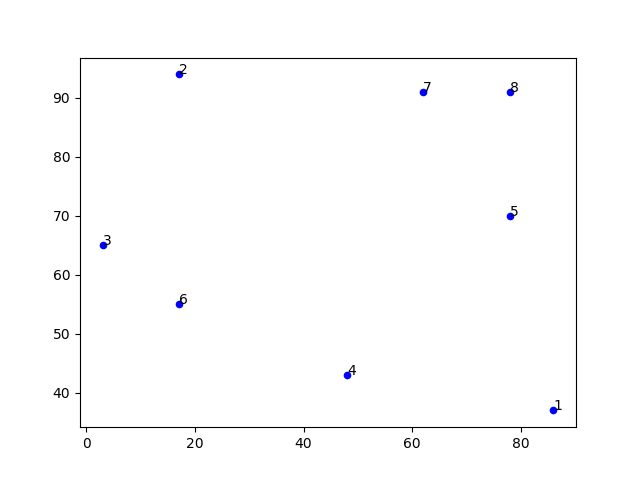


Initial Subtour


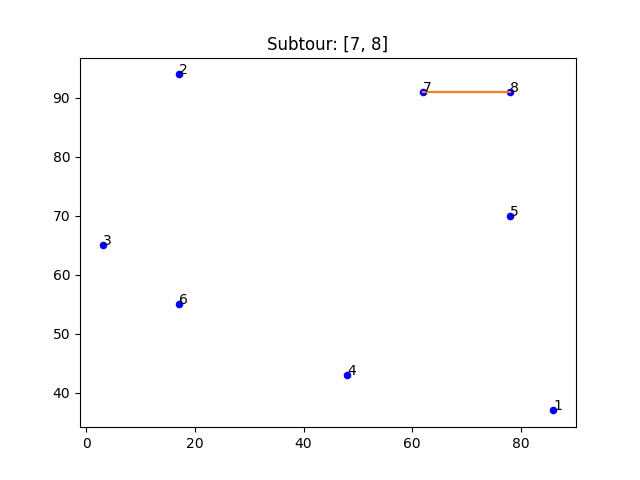


Iteration: 1
The city to add is number: 5
Previous subtour: [7, 8]
New subtour: [7, 5, 8]


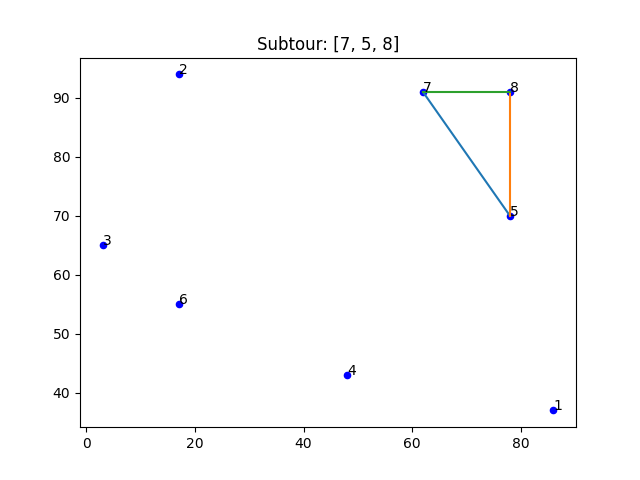

New U: [1, 2, 3, 4, 6]

Iteration: 2
The city to add is number: 1
Previous subtour: [7, 5, 8]
New subtour: [7, 1, 5, 8]


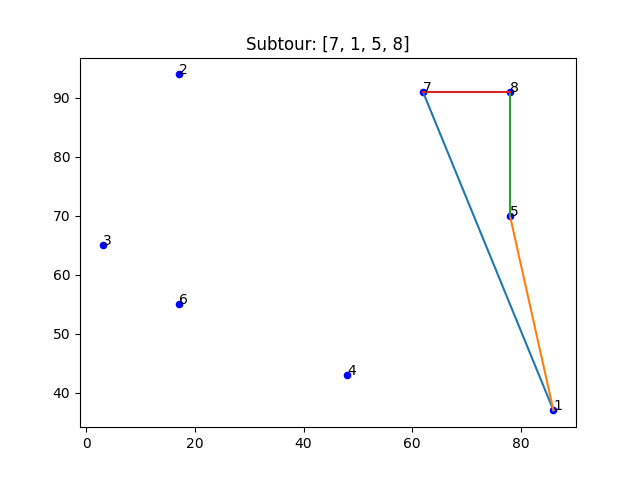

New U: [2, 3, 4, 6]

Iteration: 3
The city to add is number: 4
Previous subtour: [7, 1, 5, 8]
New subtour: [7, 4, 1, 5, 8]


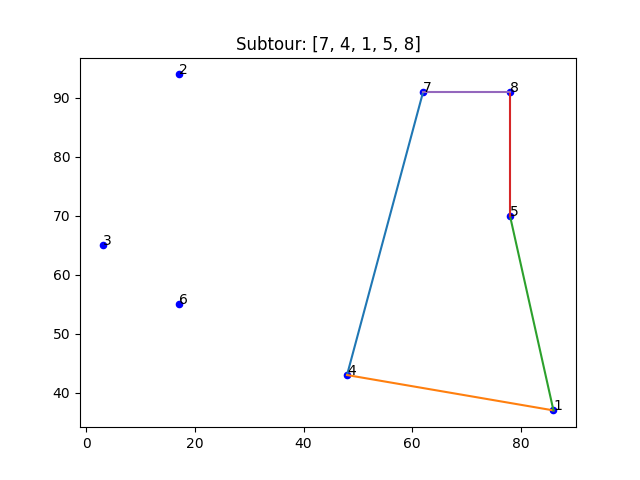

New U: [2, 3, 6]

Iteration: 4
The city to add is number: 6
Previous subtour: [7, 4, 1, 5, 8]
New subtour: [7, 6, 4, 1, 5, 8]


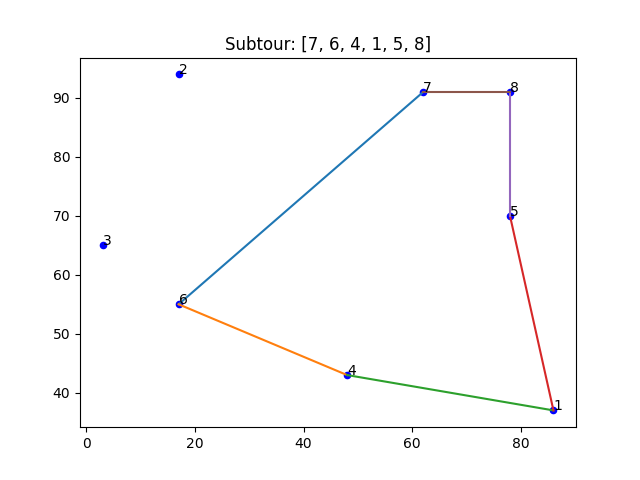

New U: [2, 3]

Iteration: 5
The city to add is number: 2
Previous subtour: [7, 6, 4, 1, 5, 8]
New subtour: [7, 2, 6, 4, 1, 5, 8]


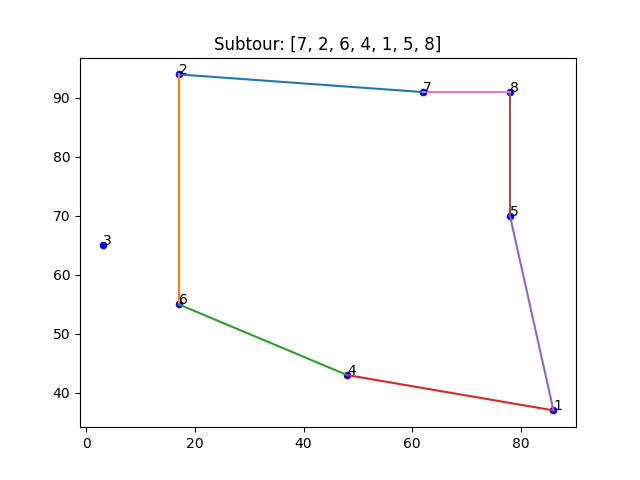

New U: [3]

Iteration: 6
The city to add is number: 3
Previous subtour: [7, 2, 6, 4, 1, 5, 8]
New subtour: [7, 2, 3, 6, 4, 1, 5, 8]


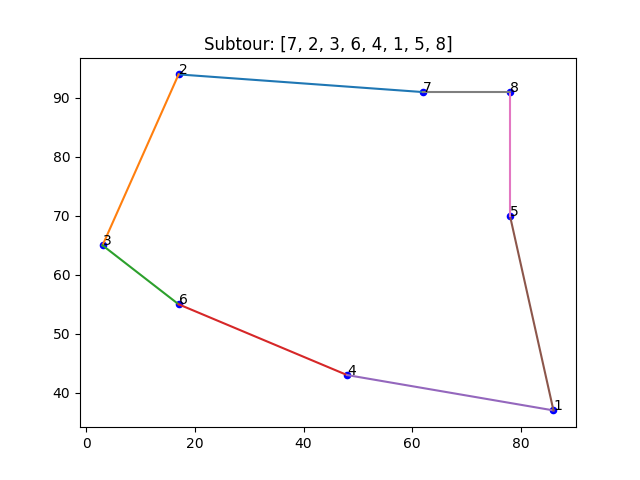

Final Tour:[7, 2, 3, 6, 4, 1, 5, 8]


In [7]:
# Main
iteration = 1
print('\nCities')
showSP()
print('\nInitial Subtour')
sPlot(T)
while len(U)!=0:
    print('\nIteration: '+str(iteration))
    costOfInsertion(distanceC(T,U))
    sPlot(T)
    newTandU()
    iteration = iteration + 1